# Poor Intialization Experiment

## Metropolis Hastings (Baseline)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

sns.set_theme()

In [2]:
class MHSampler():
    def __init__(self, log_prob, sigma=1.0):
        self.lnprob_fn = log_prob
        self.proposal_sigma = sigma

    def propose(self, x):
        return np.random.normal(x, self.proposal_sigma)

    def run(self, x0, num_iter=1000):
        Ndim = x0.shape
        chain = np.zeros((num_iter,) + Ndim)
        accept_rate = np.zeros(num_iter)

        # startup
        chain[0] = x0
        lnprob0 = self.lnprob_fn(x0)
        naccept = 0
        for i in range(1, num_iter):
            # propose
            x_star = self.propose(x0)

            # acceptance probability
            lnprob_star = self.lnprob_fn(x_star)
            H = np.exp(lnprob_star - lnprob0)

            # accept/reject step
            if np.random.uniform(0, 1) < H:
                x0 = x_star
                lnprob0 = lnprob_star
                naccept += 1

            # update chain
            chain[i] = x0
            accept_rate[i] = naccept/i

        return chain, accept_rate

## 1d test

In [3]:
def simple_gaussian_lnpost(x):
    """
    1-D Gaussian distribution with mean 1 std 2.
    """
    mu = 1
    std = 2

    return scipy.stats.norm.logpdf(x, mu, std)

In [4]:
starting_point = np.array([-0.8])
chain_under = MHSampler(simple_gaussian_lnpost, 0.1).run(starting_point, 10000)
chain_ideal = MHSampler(simple_gaussian_lnpost, 2.38).run(starting_point, 10000)
chain_over = MHSampler(simple_gaussian_lnpost, 500).run(starting_point, 10000)

Text(0.5, 1.0, '$\\sigma = 500$')

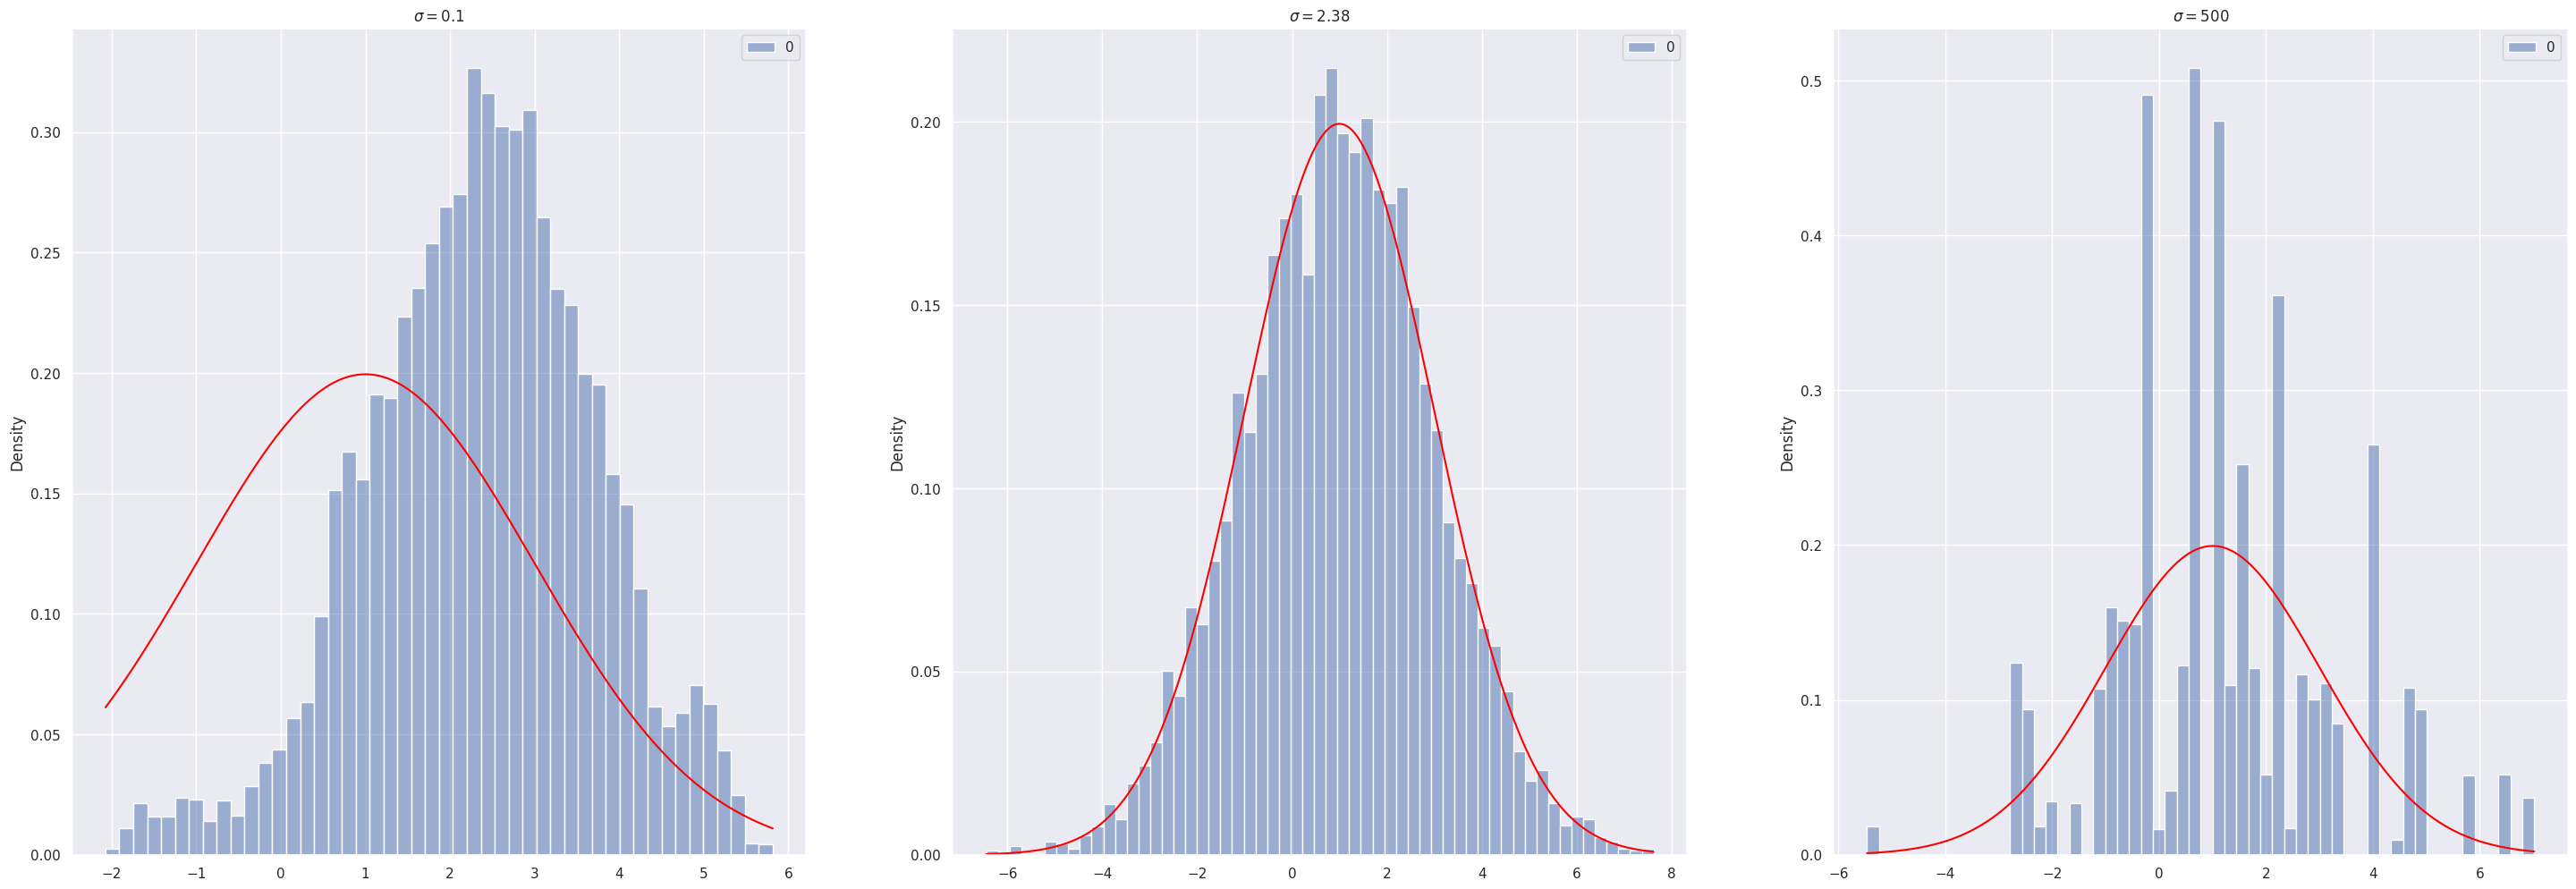

In [5]:
fig, axs = plt.subplots(ncols=3, figsize=(36, 12))

sampled_points = chain_under[0]
sns.histplot(sampled_points, stat='density', ax=axs[0])
x = np.linspace(sampled_points.min(), sampled_points.max(), 1000)
sns.lineplot(x=x, y=[np.exp(simple_gaussian_lnpost(i)) for i in x], color='red', ax=axs[0])
axs[0].set_title("$\sigma = 0.1$")

sampled_points = chain_ideal[0]
sns.histplot(sampled_points, stat='density', ax=axs[1])
x = np.linspace(sampled_points.min(), sampled_points.max(), 1000)
sns.lineplot(x=x, y=[np.exp(simple_gaussian_lnpost(i)) for i in x], color='red', ax=axs[1])
axs[1].set_title("$\sigma = 2.38$")

sampled_points = chain_over[0]
sns.histplot(sampled_points, stat='density', ax=axs[2])
x = np.linspace(sampled_points.min(), sampled_points.max(), 1000)
sns.lineplot(x=x, y=[np.exp(simple_gaussian_lnpost(i)) for i in x], color='red', ax=axs[2])
axs[2].set_title("$\sigma = 500$")


<Axes: >

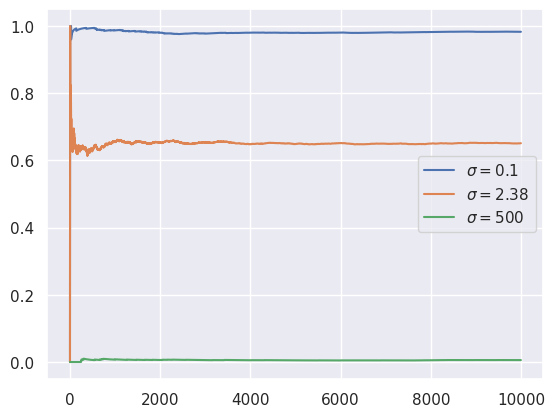

In [6]:
sns.lineplot(chain_under[1], label="$\sigma = 0.1$")
sns.lineplot(chain_ideal[1], label="$\sigma = 2.38$")
sns.lineplot(chain_over[1], label="$\sigma = 500$")

Text(0.5, 1.0, '$\\sigma = 500$')

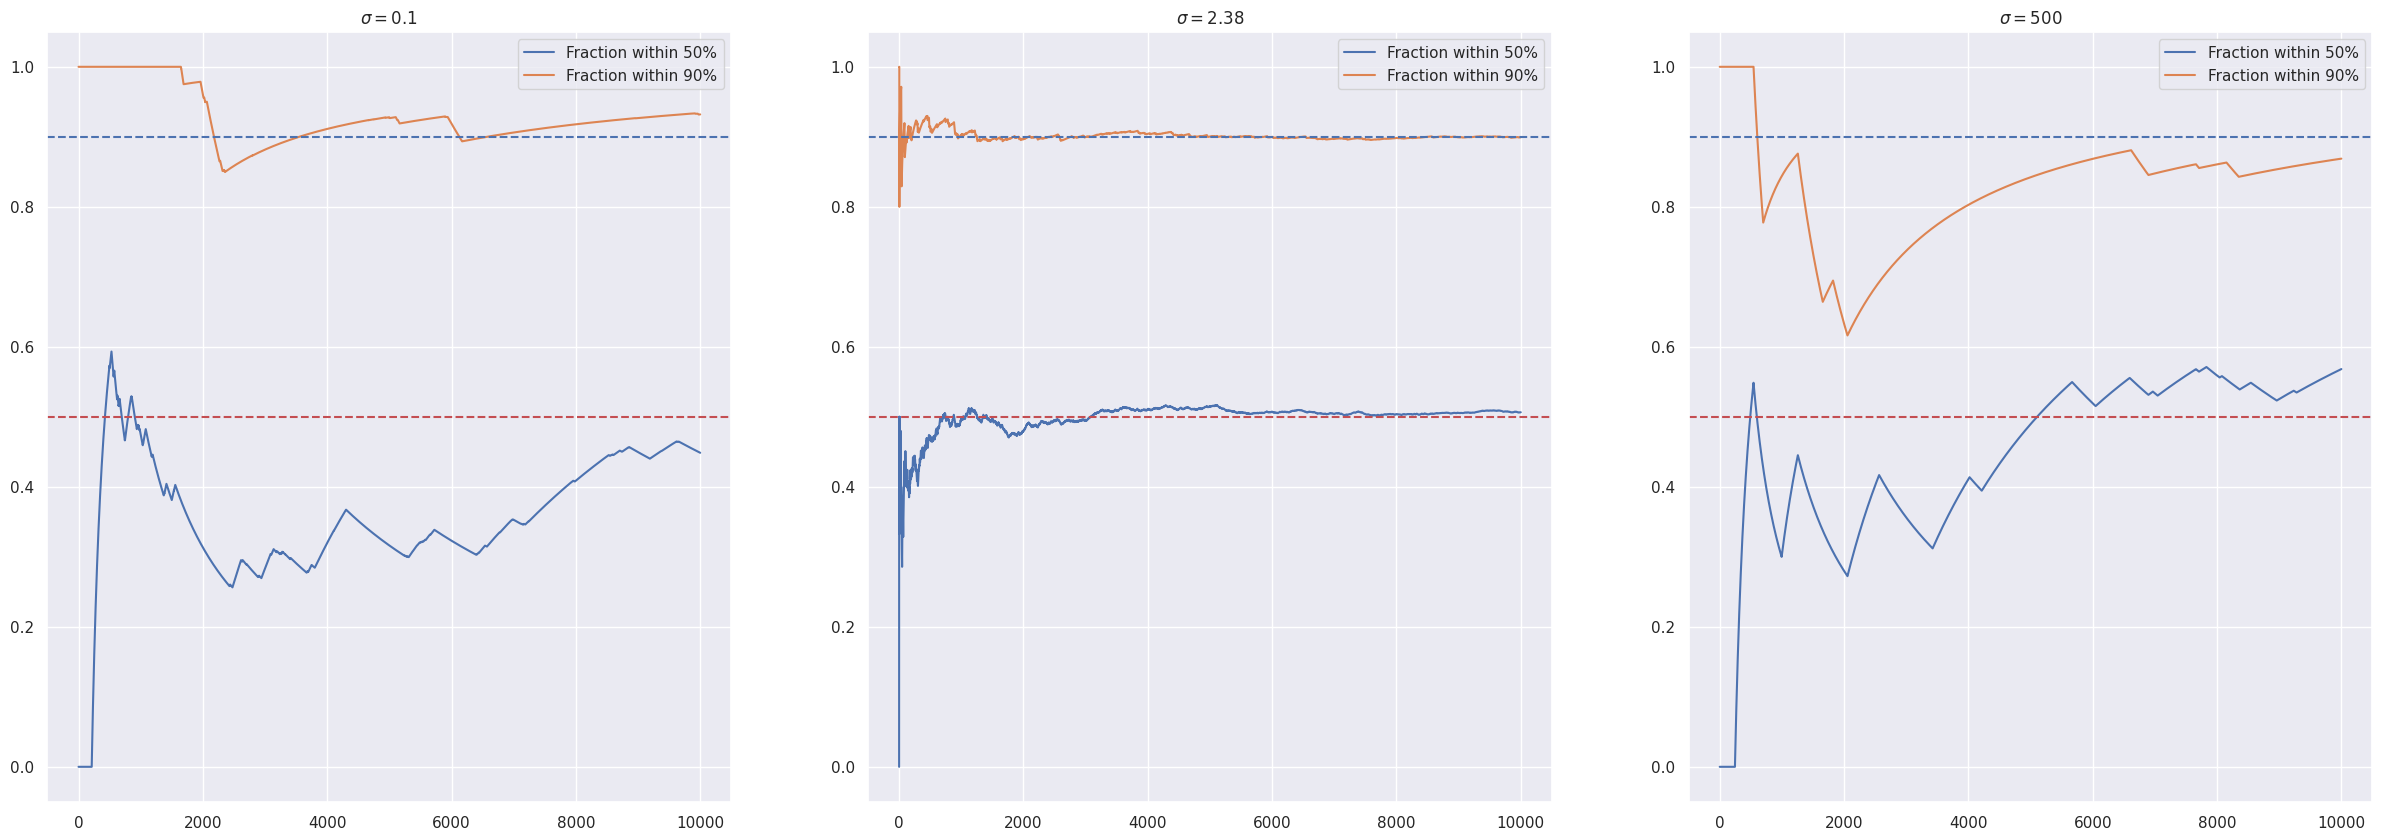

In [10]:
bound_50_low, bound_50_high = scipy.stats.norm.ppf([0.25, 0.75], loc=1, scale=2)
bound_90_low, bound_90_high = scipy.stats.norm.ppf([0.05, 0.95], loc=1, scale=2)

fig, axs = plt.subplots(ncols=3, figsize=(30, 10))

sampled_points = chain_under[0]
# Determine if points are within bounds
within_50 = (sampled_points >= bound_50_low) & (sampled_points <= bound_50_high)
within_90 = (sampled_points >= bound_90_low) & (sampled_points <= bound_90_high)
# Calculate running fraction
running_fraction_50 = np.cumsum(within_50) / np.arange(1, len(sampled_points) + 1)
running_fraction_90 = np.cumsum(within_90) / np.arange(1, len(sampled_points) + 1)
# Plotting
sns.lineplot(running_fraction_50, label='Fraction within 50%', ax=axs[0])
sns.lineplot(running_fraction_90, label='Fraction within 90%', ax=axs[0])
axs[0].axhline(y=0.5, color='r', linestyle='--')
axs[0].axhline(y=0.9, color='b', linestyle='--')
axs[0].set_title("$\sigma = 0.1$")


sampled_points = chain_ideal[0]
# Determine if points are within bounds
within_50 = (sampled_points >= bound_50_low) & (sampled_points <= bound_50_high)
within_90 = (sampled_points >= bound_90_low) & (sampled_points <= bound_90_high)
# Calculate running fraction
running_fraction_50 = np.cumsum(within_50) / np.arange(1, len(sampled_points) + 1)
running_fraction_90 = np.cumsum(within_90) / np.arange(1, len(sampled_points) + 1)
# Plotting
sns.lineplot(running_fraction_50, label='Fraction within 50%', ax=axs[1])
sns.lineplot(running_fraction_90, label='Fraction within 90%', ax=axs[1])
axs[1].axhline(y=0.5, color='r', linestyle='--')
axs[1].axhline(y=0.9, color='b', linestyle='--')
axs[1].set_title("$\sigma = 2.38$")


sampled_points = chain_over[0]
# Determine if points are within bounds
within_50 = (sampled_points >= bound_50_low) & (sampled_points <= bound_50_high)
within_90 = (sampled_points >= bound_90_low) & (sampled_points <= bound_90_high)
# Calculate running fraction
running_fraction_50 = np.cumsum(within_50) / np.arange(1, len(sampled_points) + 1)
running_fraction_90 = np.cumsum(within_90) / np.arange(1, len(sampled_points) + 1)
# Plotting
sns.lineplot(running_fraction_50, label='Fraction within 50%', ax=axs[2])
sns.lineplot(running_fraction_90, label='Fraction within 90%', ax=axs[2])
axs[2].axhline(y=0.5, color='r', linestyle='--')
axs[2].axhline(y=0.9, color='b', linestyle='--')
axs[2].set_title("$\sigma = 500$")


# Experiment

In [3]:
import AM.am as am
from dram import DRAM

In [4]:
dim = 2
cov = np.flip(np.sort(np.random.uniform(0.5, 1, dim)))
if dim == 1:
    cov[0] = 2
else:
    cov[0] = 1
    cov[-1] = 0.5

def general_gaussian_lnpost(x):
    return scipy.stats.multivariate_normal.logpdf(x, np.zeros(dim), np.diag(cov))

def general_gaussian_post(x):
    return scipy.stats.multivariate_normal.pdf(x, np.zeros(dim), np.diag(cov))

In [9]:
starting_point = scipy.stats.multivariate_normal.rvs(mean=np.zeros(2), cov=np.diag(cov))
sigma = 0.01

AMsampler = am.AdaptiveMetropolis(general_gaussian_post, starting_point, sd=(2.4**2)/dim, epsilon=1e-6, t0=200, iterations=20000+200)
DRAMSampler = DRAM(general_gaussian_post, initial_params=starting_point, iterations=20000+200, adaptation_interval=200, sd=(2.4**2)/dim)

chain2 = AMsampler.getOutput()[200:]
chain1 = MHSampler(general_gaussian_lnpost, sigma).run(starting_point, num_iter=20000)[0]
chain3 = DRAMSampler.run()[200:]

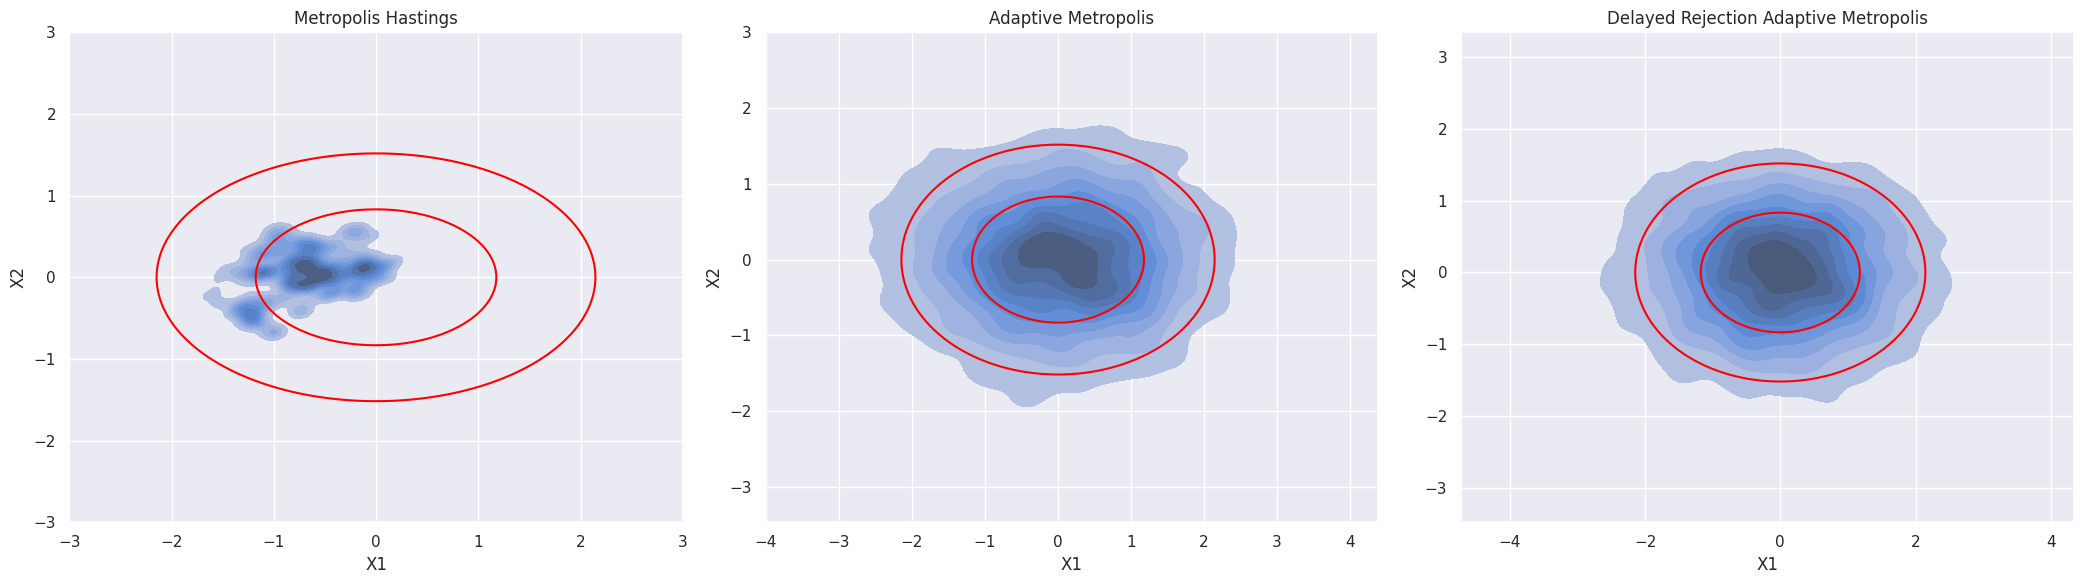

In [18]:
# Function to plot the contour for each chain
def plot_gaussian_contour(chains, mean, covariance_matrix, range_size=3, grid_points=100):
    # Create a grid of points for plotting the contour
    x = np.linspace(-range_size, range_size, grid_points)
    y = np.linspace(-range_size, range_size, grid_points)
    X, Y = np.meshgrid(x, y)

    # Determine the chi-square value for the given percentiles
    chi_square_50 = scipy.stats.chi2.ppf(0.5, 2)
    chi_square_90 = scipy.stats.chi2.ppf(0.9, 2)

    plt.figure(figsize=(21, 6))  # Larger figure size for three subplots

    titles = ['Metropolis Hastings', 'Adaptive Metropolis', 'Delayed Rejection Adaptive Metropolis']

    for i, chain in enumerate(chains, 1):
        plt.subplot(1, len(chains), i)
        Z = np.array([((np.array([xi, yi]) - mean).T @ np.linalg.inv(covariance_matrix) @ (np.array([xi, yi]) - mean))
                      for xi, yi in zip(np.ravel(X), np.ravel(Y))])
        Z = Z.reshape(X.shape)

        # Plot the contour
        plt.contour(X, Y, Z, levels=[chi_square_50, chi_square_90], colors='red')
        sns.kdeplot(x=chain[:, 0], y=chain[:, 1], fill=True)

        # Labels and title
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(titles[i-1])
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with all three chains
chains = [chain1, chain2, chain3]
covariance_matrix = np.diag([1, 0.5])  # Example covariance matrix
plot_gaussian_contour(chains, mean=np.zeros(2), covariance_matrix=covariance_matrix)


In [20]:
def points_inside_contour(vectors, mean, covariance_matrix, percentile=0.5):
    """
    Counts the number of points in a list of 2D vectors that fall inside the specified
    percentile contour of a 2D Gaussian distribution.

    :param vectors: List of 2D vectors.
    :param mean: Mean of the Gaussian distribution (2D vector).
    :param covariance_matrix: Covariance matrix of the Gaussian distribution (2x2 matrix).
    :param percentile: Percentile for the contour (default is 0.5 for 50% probability region).
    :return: Number of points inside the contour.
    """
    # Calculate the chi-square value for the given percentile
    chi_square_value = scipy.stats.chi2.ppf(percentile, 2)

    # Calculate the inverse of the covariance matrix
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

    # Count points inside the contour
    return [int((vector - mean).T @ inverse_covariance_matrix @ (vector - mean) <= chi_square_value) for vector in vectors]

In [26]:
np.cumsum(points_inside_contour(chain1, mean=np.zeros(2), covariance_matrix=np.diag(cov), percentile=0.5))/np.arange(1, len(chain1)+1)

array([1.        , 1.        , 1.        , ..., 0.76927693, 0.76928846,
       0.7693    ])

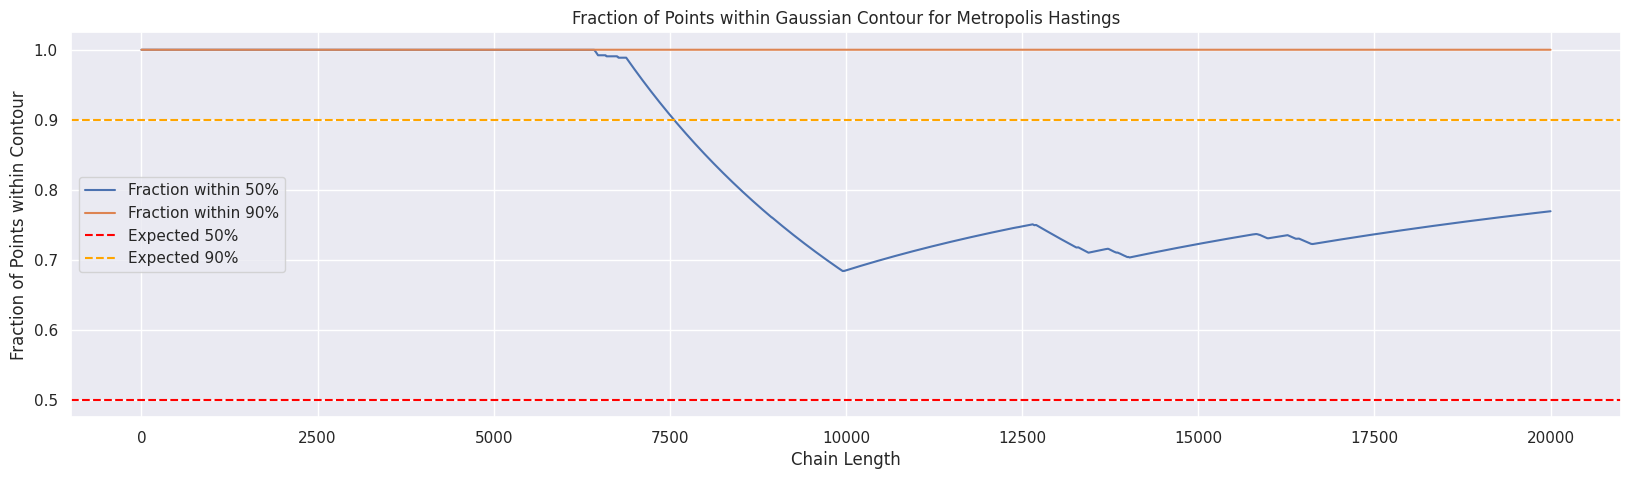

In [29]:
# Implementation as suggested by the user
def points_inside_contour(vectors, mean, covariance_matrix, percentile=0.5):
    """
    Identifies which points in a list of 2D vectors fall inside the specified
    percentile contour of a 2D Gaussian distribution.

    :param vectors: List of 2D vectors.
    :param mean: Mean of the Gaussian distribution (2D vector).
    :param covariance_matrix: Covariance matrix of the Gaussian distribution (2x2 matrix).
    :param percentile: Percentile for the contour (default is 0.5 for 50% probability region).
    :return: Array indicating whether each point is inside the contour (1) or not (0).
    """
    chi_square_value = scipy.stats.chi2.ppf(percentile, 2)
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

    return np.array([(vector - mean).T @ inverse_covariance_matrix @ (vector - mean) <= chi_square_value
                     for vector in vectors])

# Calculate the cumsum for points within the 50% and 90% contours
inside_50_cumsum = np.cumsum(points_inside_contour(chain1, mean=np.zeros(2), covariance_matrix=np.diag(cov), percentile=0.5))
inside_90_cumsum = np.cumsum(points_inside_contour(chain1, mean=np.zeros(2), covariance_matrix=np.diag(cov), percentile=0.9))

# Calculate the fraction of points within the contour over the chain length
fractions_inside_50 = inside_50_cumsum / np.arange(1, len(chain1) + 1)
fractions_inside_90 = inside_90_cumsum / np.arange(1, len(chain1) + 1)

# Plot the results
plt.figure(figsize=(20, 5))
plt.plot(fractions_inside_50, label='Fraction within 50%')
plt.plot(fractions_inside_90, label='Fraction within 90%')
plt.axhline(0.5, color='red', linestyle='--', label='Expected 50%')
plt.axhline(0.9, color='orange', linestyle='--', label='Expected 90%')
plt.xlabel('Chain Length')
plt.ylabel('Fraction of Points within Contour')
plt.title('Fraction of Points within Gaussian Contour for Metropolis Hastings')
plt.legend()
plt.grid(True)
plt.show()


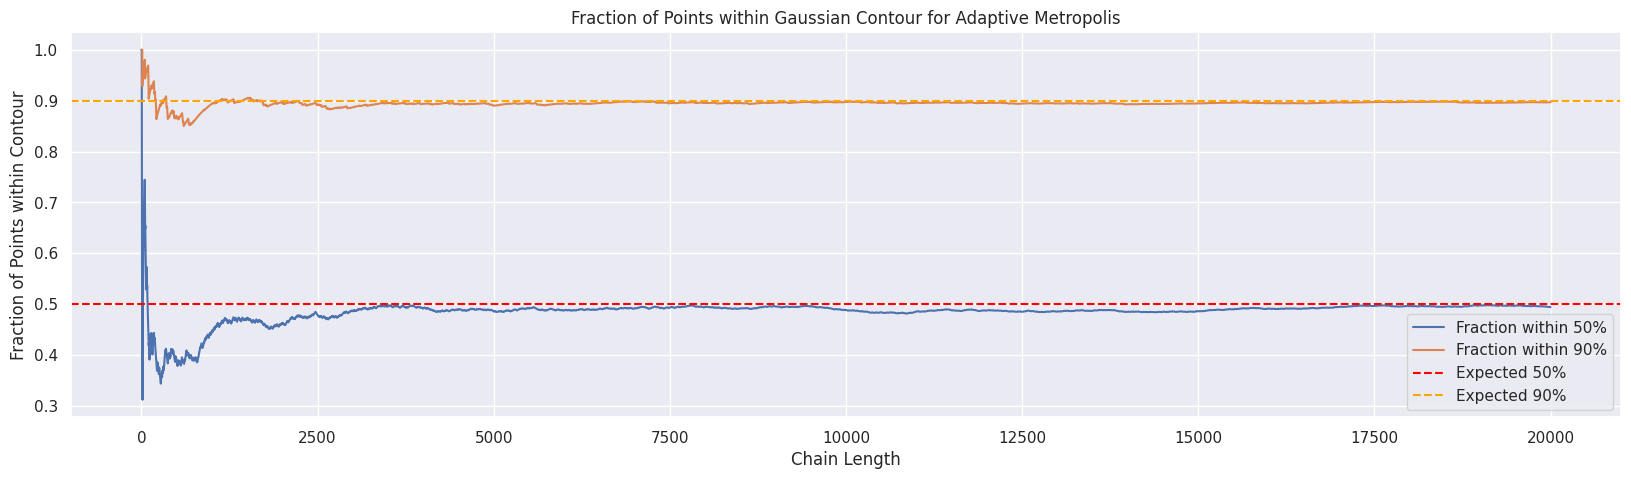

In [30]:
# Calculate the cumsum for points within the 50% and 90% contours
inside_50_cumsum = np.cumsum(points_inside_contour(chain2, mean=np.zeros(2), covariance_matrix=np.diag(cov), percentile=0.5))
inside_90_cumsum = np.cumsum(points_inside_contour(chain2, mean=np.zeros(2), covariance_matrix=np.diag(cov), percentile=0.9))

# Calculate the fraction of points within the contour over the chain length
fractions_inside_50 = inside_50_cumsum / np.arange(1, len(chain2) + 1)
fractions_inside_90 = inside_90_cumsum / np.arange(1, len(chain2) + 1)

# Plot the results
plt.figure(figsize=(20, 5))
plt.plot(fractions_inside_50, label='Fraction within 50%')
plt.plot(fractions_inside_90, label='Fraction within 90%')
plt.axhline(0.5, color='red', linestyle='--', label='Expected 50%')
plt.axhline(0.9, color='orange', linestyle='--', label='Expected 90%')
plt.xlabel('Chain Length')
plt.ylabel('Fraction of Points within Contour')
plt.title('Fraction of Points within Gaussian Contour for Adaptive Metropolis')
plt.legend()
plt.grid(True)
plt.show()


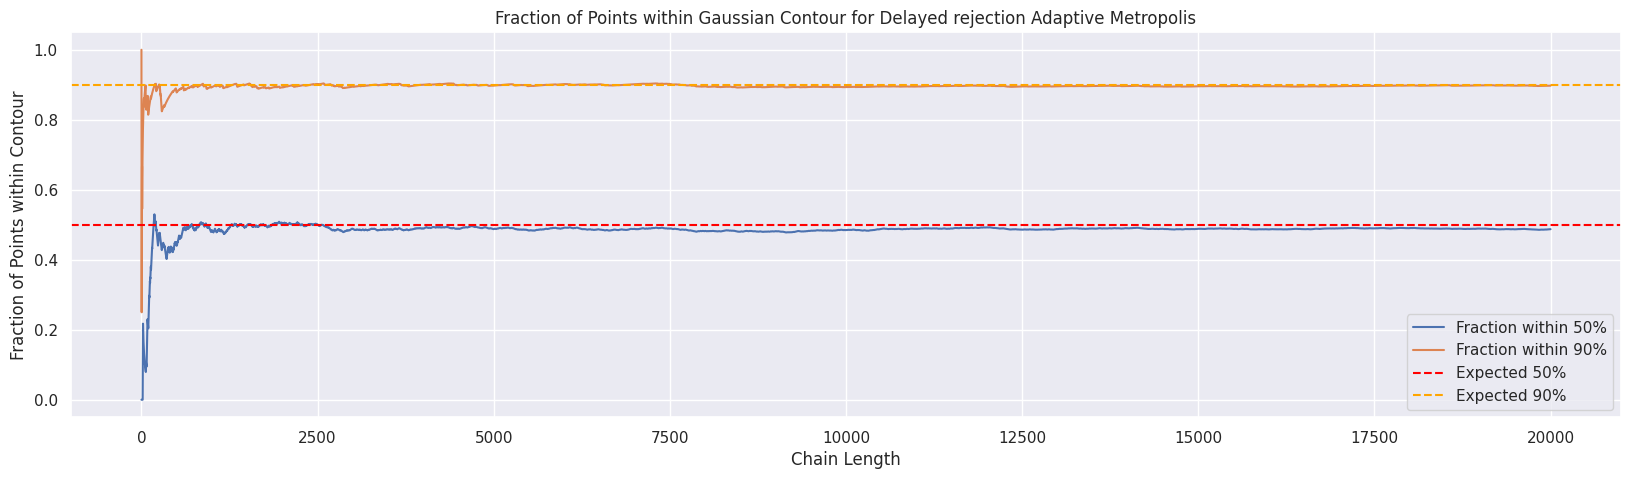

In [31]:
# Calculate the cumsum for points within the 50% and 90% contours
inside_50_cumsum = np.cumsum(points_inside_contour(chain3, mean=np.zeros(2), covariance_matrix=np.diag(cov), percentile=0.5))
inside_90_cumsum = np.cumsum(points_inside_contour(chain3, mean=np.zeros(2), covariance_matrix=np.diag(cov), percentile=0.9))

# Calculate the fraction of points within the contour over the chain length
fractions_inside_50 = inside_50_cumsum / np.arange(1, len(chain3) + 1)
fractions_inside_90 = inside_90_cumsum / np.arange(1, len(chain3) + 1)

# Plot the results
plt.figure(figsize=(20, 5))
plt.plot(fractions_inside_50, label='Fraction within 50%')
plt.plot(fractions_inside_90, label='Fraction within 90%')
plt.axhline(0.5, color='red', linestyle='--', label='Expected 50%')
plt.axhline(0.9, color='orange', linestyle='--', label='Expected 90%')
plt.xlabel('Chain Length')
plt.ylabel('Fraction of Points within Contour')
plt.title('Fraction of Points within Gaussian Contour for Delayed rejection Adaptive Metropolis')
plt.legend()
plt.grid(True)
plt.show()
